# INVESTMENT ASSIGNMENT SUBMISSION 

# Name : Sathish Kumar G

##### Project Brief
we work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.


#### Business and Data Understanding
Spark Funds has two minor constraints for investments:

 1. It wants to invest between 5 to 15 million USD per round of investment

 2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in


#### Business objective:
    
  The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.
    
#### Goals of data analysis:
Our goals are divided into three sub-goals:

###### Investment type analysis: 
Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.

##### Country analysis:
Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.

##### Sector analysis:
Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

In [1]:
#import libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### Checkpoint 1: Data Cleaning 1

In [2]:
companies= pd.read_csv('companies.csv')
rounds2 = pd.read_csv('rounds2.csv')

In [3]:
print(companies.info())
companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
None


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
print(rounds2.info())
rounds2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


###### Here observed some value in "company permalink" is mixed with both upper and lower case values, so converting to lower case

In [5]:
# converted to rounds2.company_permalink and companies.permalink to lower
rounds2.company_permalink = rounds2.company_permalink.apply(lambda company_permalink: company_permalink.lower())
companies.permalink = companies.permalink.apply(lambda company : company.lower())
print(rounds2.company_permalink.describe())
print(companies.permalink.describe())

count                       114949
unique                       66373
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object
count                     66368
unique                    66368
top       /organization/arisoko
freq                          1
Name: permalink, dtype: object


Also observerd values are encoded, so loaded using encoding = 'iso-8859-1'

refered : https://docs.python.org/2.4/lib/standard-encodings.html

<p style="color:green">Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.</p>


In [6]:
#Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.
companies= pd.read_csv('companies.csv',encoding ='iso-8859-1')
rounds2 = pd.read_csv('rounds2.csv',encoding ='iso-8859-1')

rounds2.company_permalink = rounds2.company_permalink.apply(lambda company_permalink: company_permalink.lower())
companies.permalink = companies.permalink.apply(lambda company : company.lower())

In [7]:
#using describe function to find unique values in rounds2.company_permalink
rounds2.company_permalink.describe()

count                       114949
unique                       66370
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [8]:
#using describe function to find unique values in companies.permalink
companies.permalink.describe()

count                     66368
unique                    66368
top       /organization/arisoko
freq                          1
Name: permalink, dtype: object

In [9]:
#check difference between rounds2 & comapies using permalink as primary key
rounds2.loc[~rounds2.company_permalink.isin(companies.permalink.tolist()),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN



<p style="color:red;">I was able to find from above output, first record "/ORGANIZATION/E-C√äBICA" is in rounds2 and "/Organization/E-C„öbica" is in company table also. But still there was some difference, so I tried encode value with utf-8 and decode with ascii</p>


In [10]:
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [11]:
#How many unique companies are present in rounds2?
rounds2.company_permalink.describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [12]:
#How many unique companies are present in the companies file?
companies.permalink.describe()

count                     66368
unique                    66368
top       /organization/arisoko
freq                          1
Name: permalink, dtype: object

In [13]:
#Are there any companies in the rounds2 file which are not  present in companies ? 
rounds2.loc[~rounds2.company_permalink.isin(companies.permalink.tolist()),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [14]:
#renaming company column permalink to company_permalink
companies = companies.rename(columns= {'permalink': 'company_permalink'},inplace=False)

In [15]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company_permalink  66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   status             66368 non-null  object
 5   country_code       59410 non-null  object
 6   state_code         57821 non-null  object
 7   region             58338 non-null  object
 8   city               58340 non-null  object
 9   founded_at         51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [16]:
#Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?
master_frame = pd.merge(rounds2, companies , how='inner', on='company_permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [17]:
#Listing down the columns info after merging
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

There are 114949 entries in master_frame after merging

# Treating missing values

In [18]:
#calculate percentage of missing value
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

##### Noticed there are few columns with 72%,17%,5%,2%etc  with missing values 


"funding_round_code" has highest percentage of 72%,it seems most of values are not present. so it better to drop the column since it is not going to affect our analysis for given problem statement.Second highest are founded_at and raised_amount_usd, similarly dropping "founded_at" will not affect our analysis, so we will drop that column too, but it is not the same case for raised_amount_us, since it is used most for our analysis. we will remove only the rows that are "NaN"

In [19]:
#drop rows that contaiin na in "raised_amount_usd" and drop column "funding_round_code" & "founded_at"
master_frame = master_frame.dropna(subset=['raised_amount_usd'])
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [20]:
#calculate percentage of missing value
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

#### Still there are few columns, here "category_list" and "country_code" are mainly used during English speaking country analysis and segment anaylsis. so well remove rows with "NaN"

In [21]:
#drop rows that contaiin na in "category_list" and "country_code"
master_frame = master_frame.dropna(subset=['category_list'])
master_frame = master_frame.dropna(subset=['country_code'])

In [22]:
#calculate percentage of missing value
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               3.67
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

In [23]:
#calculate sum of null in a row
master_frame.isnull().sum(axis=1).sort_values(ascending=False)

94589     4
64844     4
82318     4
112216    4
5862      4
         ..
39162     0
39161     0
39160     0
39158     0
114947    0
Length: 88529, dtype: int64

In [24]:
master_frame[master_frame.isnull().sum(axis=1) == 4].head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
5862,/organization/animating-touch,/funding-round/921a01019800b35cfc2fffa452f6c1fb,grant,01-03-2012,25000.0,Animating Touch,NaN,Mobile,closed,RUS,NaN,NaN,NaN
7493,/organization/argus,/funding-round/b781b21030387359319622265218a2ae,seed,23-06-2012,167000.0,Argus,NaN,Hardware|Software,operating,RUS,NaN,NaN,NaN
8674,/organization/audacious,/funding-round/f651dac5d60d960cce6f63ca5217dd96,venture,09-08-2011,163406.0,Audacious,NaN,Curated Web,operating,GBR,NaN,NaN,NaN
11155,/organization/beliaa,/funding-round/08d6a0e416fd90a443747cda0a936533,seed,07-07-2014,10198.0,Beliaa,NaN,Apps|Automotive|Cars|Innovation Management|Mec...,operating,EGY,NaN,NaN,NaN
15112,/organization/brightcove-k-k,/funding-round/3da48659b330a3d474c5afea90bc61c4,venture,22-05-2008,4900000.0,Brightcove K.K.,NaN,Games|Video,operating,JPN,NaN,NaN,NaN
18805,/organization/chamate,/funding-round/2993a357611c8245e2e85dfa9e5e2e1b,venture,15-12-2006,7500000.0,Chamate,NaN,Health and Wellness,operating,TWN,NaN,NaN,NaN
18806,/organization/chamate,/funding-round/6e613b12cbc82b9de662ebe55acd49a0,venture,01-09-2008,23000000.0,Chamate,NaN,Health and Wellness,operating,TWN,NaN,NaN,NaN
19915,/organization/citic-pharmaceuticals-co-ltd,/funding-round/d88e8225f35b435ef5513c12eac440f0,venture,01-12-2009,1000000.0,CITIC Pharmaceutical,NaN,Health Care,operating,CHN,NaN,NaN,NaN
19917,/organization/citic-pharmaceuticals-co-ltd,/funding-round/ecb8cf490b7d2d3a907688ed11c7f997,venture,01-04-2008,22100000.0,CITIC Pharmaceutical,NaN,Health Care,operating,CHN,NaN,NaN,NaN
23940,/organization/coupad,/funding-round/09af2437594be8f859db1f876d98f4ea,seed,23-06-2005,75000.0,Coupad,NaN,Consumer Goods,operating,USA,NaN,NaN,NaN


From above output, we could able to understand. "homepage_url", "sate_code", "region" & "city" are major columns with Nan. if remove these rows that might affect our analysis, so not removing those rows. Instead we can remove those columns if required.

In [25]:
master_frame = master_frame.drop('homepage_url', axis=1)

In [26]:
#calculate percentage of missing value
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

###  Checkpoint 2: Funding Type Analysis

In [27]:
#finding no of investments in each funding type
funding_round_type_count = master_frame.funding_round_type.value_counts()
print(funding_round_type_count)

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64


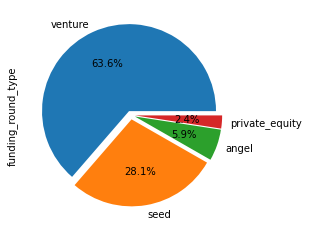

In [28]:
#ploted same using plot pie
funding_round_type_count.loc[['venture','seed','angel','private_equity']].plot.pie(autopct="%.1f%%",explode=[0.05]*4)
plt.show()

From above we can understand "venture" funding type is where most investors are investing.

In [29]:
#finding mean for each funding type
mean_by_funding_roundtype = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

mean_by_funding_roundtype

funding_round_type
post_ipo_debt            1.694518e+08
secondary_market         8.443853e+07
private_equity           7.393849e+07
post_ipo_equity          6.607706e+07
debt_financing           1.716765e+07
undisclosed              1.589166e+07
venture                  1.172422e+07
grant                    4.512698e+06
product_crowdfunding     1.353227e+06
convertible_note         1.337187e+06
angel                    9.715739e+05
seed                     7.477937e+05
equity_crowdfunding      5.098980e+05
non_equity_assistance    4.807534e+05
Name: raised_amount_usd, dtype: float64

In [30]:
print("Representative funding amount of venture type -- ",round(mean_by_funding_roundtype['venture']))
print("Representative funding amount of angel type -- ",round(mean_by_funding_roundtype['angel']))
print("Representative funding amount of seed type -- ",round(mean_by_funding_roundtype['seed']))
print("Representative funding amount of private equity type -- ",round(mean_by_funding_roundtype['private_equity']))

Representative funding amount of venture type --  11724223
Representative funding amount of angel type --  971574
Representative funding amount of seed type --  747794
Representative funding amount of private equity type --  73938486


In [31]:
print("Does venture fund type satisfy the constrain 5 to 15 million USD ? ",
     'Yes' if ((mean_by_funding_roundtype['venture'] > 5000000)  & (mean_by_funding_roundtype['venture'] < 15000000)) else 'No')

Does venture fund type satisfy the constrain 5 to 15 million USD ?  Yes


In [32]:
print("Does private equity fund type satisfy the constrain 5 to 15 million USD ? ",
     'Yes' if ((mean_by_funding_roundtype['private_equity'] > 5000000)  & (mean_by_funding_roundtype['private_equity'] < 15000000)) else 'No')

Does private equity fund type satisfy the constrain 5 to 15 million USD ?  No


In [33]:
print("Does angel fund type satisfy the constrain 5 to 15 million USD ? ",
     'Yes' if ((mean_by_funding_roundtype['angel'] > 5000000)  & (mean_by_funding_roundtype['angel'] < 15000000)) else 'No')

Does angel fund type satisfy the constrain 5 to 15 million USD ?  No


In [34]:
print("Does seed fund type satisfy the constrain 5 to 15 million USD ? ",
     'Yes' if ((mean_by_funding_roundtype['seed'] > 5000000)  & (mean_by_funding_roundtype['seed'] < 15000000)) else 'No')

Does seed fund type satisfy the constrain 5 to 15 million USD ?  No


### Country Analysis

In [35]:
# Filter only venture funding round type for futher analysis
venture_master_frame = master_frame.loc[master_frame.funding_round_type == 'venture']
venture_master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View


In [36]:
#Analysing the Top 3 English-Speaking Countries
top_9_countries = venture_master_frame.groupby('country_code')['raised_amount_usd'].sum().round().sort_values(ascending = False)[:9]
print(top_9_countries)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64


Referance: https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

#### USA, GRB, IND are top three countries investing in veture fund type

In [37]:
# Filter only top 3 countries funding details for further analysis
country_master_frame = venture_master_frame.loc[(venture_master_frame.country_code == 'USA')| (venture_master_frame.country_code == 'GBR') 
                         | (venture_master_frame.country_code == 'IND')]
country_master_frame.head()


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino


# Checkpoint 4: Sector Analysis 1

In [38]:
#read mapping.csv
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [39]:
#analyse columns of mapping
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [40]:
#convert "category_list" to string
mapping.category_list = mapping.category_list.astype(str)

In [41]:
#I was getting error while finding category in mapping table, for example A0lytics, 0tural. so replaced '0' with 'na'
mapping.category_list = mapping.category_list.apply(lambda category: category.replace('0','na').lower())

In [42]:
#deriving primary_sector column,by given buisness rule
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
country_master_frame['primary_sector'] = country_master_frame.category_list.apply(lambda categories: categories.split('|')[0].lower())

In [43]:
country_master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai,media
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps


In [44]:
#set index as category_list 
mapping.set_index('category_list', inplace=True)
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, nan to young adults
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Automotive & Sports                      688 non-null    int64
 1   Blanks                                   688 non-null    int64
 2   Cleantech / Semiconductors               688 non-null    int64
 3   Entertainment                            688 non-null    int64
 4   Health                                   688 non-null    int64
 5   Manufacturing                            688 non-null    int64
 6   News, Search and Messaging               688 non-null    int64
 7   Others                                   688 non-null    int64
 8   Social, Finance, Analytics, Advertising  688 non-null    int64
dtypes: int64(9)
memory usage: 53.8+ KB


In [45]:
val = mapping.to_dict()
val.keys()

dict_keys(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'])

In [46]:
# converted mapping dataframe to dictionay withh key as primary_caategory and value as main sector
res = {}
for x in val.keys():
    for key,value in val[x].items():
        if value == 1 :
            res[str(key).lower()] = x


In [47]:
#In above step while converting 0 to na,enterprise 2.0 converted to enterprise 2.na. so go error in below step.So converting back to enterprise 2.0 
res['enterprise 2.0'] = res.pop('enterprise 2.na')

In [48]:
res['enterprise 2.0']

'Others'

In [49]:
#create a column main_sector if primay category found in res dictionary
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
country_master_frame['main_sector'] = country_master_frame.primary_sector.apply(lambda primarySector : res[primarySector] if primarySector in res else np.nan ) 



In [50]:
#checking is na present in main_sector column
country_master_frame.loc[country_master_frame['main_sector'].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
20328,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.0,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,NJ,Newark,East Brunswick,natural gas uses,NaN
28541,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,MA,Boston,Wellesley,adaptive equipment,NaN
35278,/organization/fia-formula-e,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.0,FIA Formula E,Racing,closed,GBR,F1,GBR - Other,Hammersmith,racing,NaN
36012,/organization/five-below,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194000000.0,Five Below,Specialty Retail,ipo,USA,PA,Philadelphia,Philadelphia,specialty retail,NaN
43506,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,CA,SF Bay Area,San Ramon,biotechnology and semiconductor,NaN
51816,/organization/justinmind,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,CA,SF Bay Area,San Francisco,rapidly expanding,NaN
70078,/organization/omega-point-research,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3172815.0,Omega Point Research,Product Search,closed,USA,CA,SF Bay Area,Los Altos,product search,NaN
87657,/organization/sense-labs-inc-,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,29-12-2014,2499999.0,Sense,GreenTech|Hardware|Home Automation|Internet of...,operating,USA,MA,Boston,Cambridge,greentech,NaN
88384,/organization/shantiniketan-incorporated,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,01-08-2008,1100000.0,ShantiNiketan Inc.,Retirement,closed,USA,FL,Orlando,Tavares,retirement,NaN
88385,/organization/shantiniketan-incorporated,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,01-05-2011,2000000.0,ShantiNiketan Inc.,Retirement,closed,USA,FL,Orlando,Tavares,retirement,NaN


In [51]:
country_master_frame = country_master_frame.dropna(subset=['main_sector'])

In [52]:
round(100*(country_master_frame.isnull().sum()/len(country_master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 0.19
region                     0.40
city                       0.40
primary_sector             0.00
main_sector                0.00
dtype: float64

# Checkpoint 5: Sector Analysis 2

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

#### Note: In the following table, all the observations refer to investments of the type FT within 5-15 M USD range. 

In [53]:
#Filter data where investments of the venture type within 5-15 M USD range
sector_main_frame = country_master_frame.loc[(country_master_frame.raised_amount_usd >= 5000000) & (country_master_frame.raised_amount_usd <= 15000000) ]

In [54]:
sector_main_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai,media,Entertainment
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging"
103,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,128 Technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,service providers,Others
110,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,manufacturing,Manufacturing


In [55]:
#groupby country code.. 
groupByCountry = sector_main_frame.groupby('country_code')

In [56]:
#Total number of Investments (count)
groupByCountry['raised_amount_usd'].count().sort_values(ascending = False)

country_code
USA    12063
GBR      621
IND      328
Name: raised_amount_usd, dtype: int64

https://seaborn.pydata.org/generated/seaborn.countplot.html 


https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

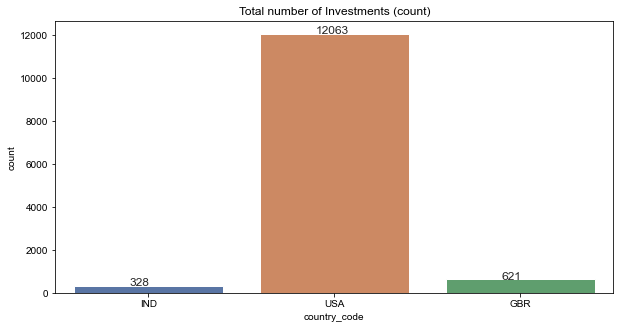

In [57]:
plt.figure(figsize=(10,5))
plt.title('Total number of Investments (count)')
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=sector_main_frame.country_code, data=sector_main_frame)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1))


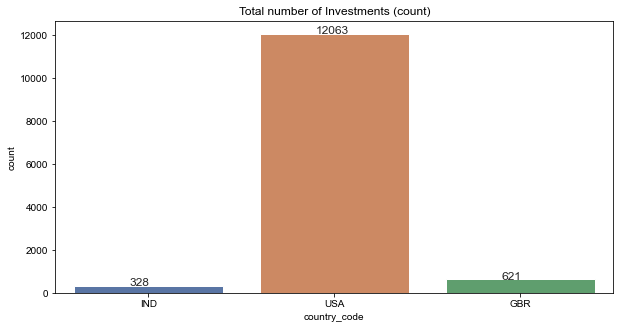

In [57]:
plt.figure(figsize=(10,5))
plt.title('Total number of Investments (count)')
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=sector_main_frame.country_code, data=sector_main_frame)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1))


In [58]:
#Total amount of investment (USD)
groupByCountry['raised_amount_usd'].sum().sort_values(ascending = False).apply(lambda x :'{:.0f}'.format(x) )

country_code
USA    107757097294
GBR      5379078691
IND      2949543602
Name: raised_amount_usd, dtype: object

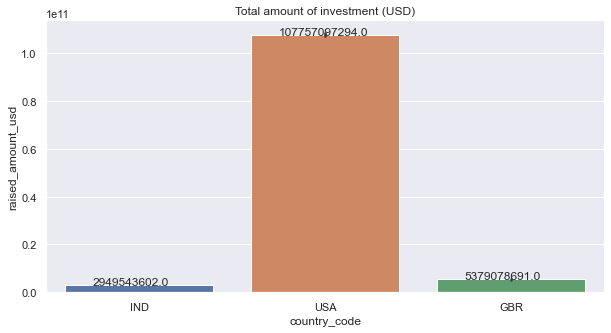

In [59]:
plt.figure(figsize=(10,5))
plt.title('Total amount of investment (USD)')
sns.set_theme(style="darkgrid")
ax = sns.barplot(data=sector_main_frame, x='country_code',y='raised_amount_usd', estimator=np.sum)

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()))
    

In [60]:
#D1 data frame contains only 'USA'
D1 = sector_main_frame.loc[sector_main_frame.country_code == 'USA']

In [61]:
#D2 data frame contains only 'GBR'
D2 = sector_main_frame.loc[sector_main_frame.country_code == 'GBR']

In [62]:
#D3 data frame contains only 'IND'
D3 = sector_main_frame.loc[sector_main_frame.country_code == 'IND']

In [63]:
#group by main sector in D1 ('USA data frame') to find count
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)


main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

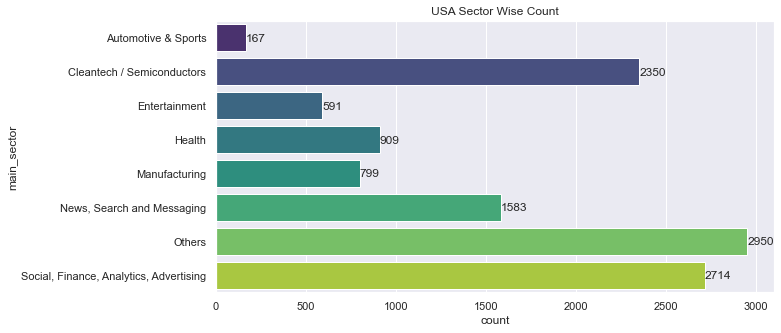

In [64]:
plt.figure(figsize=(10,5))
plt.title('USA Sector Wise Count')
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=D1.main_sector.sort_values(), data=D1,palette='viridis')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_width()), (p.get_width(), p.get_y()+0.50))

#### Top Sector name (no. of investment-wise) USA --- Others --- 2950
#### Second Sector name (no. of investment-wise) USA --- Social, Finance, Analytics, Advertising --- 2714
#### Third Sector name (no. of investment-wise) USA --- Cleantech / Semiconductors --- 2350

In [65]:
#group by main sector in D2 ('GBR data frame') to find count
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

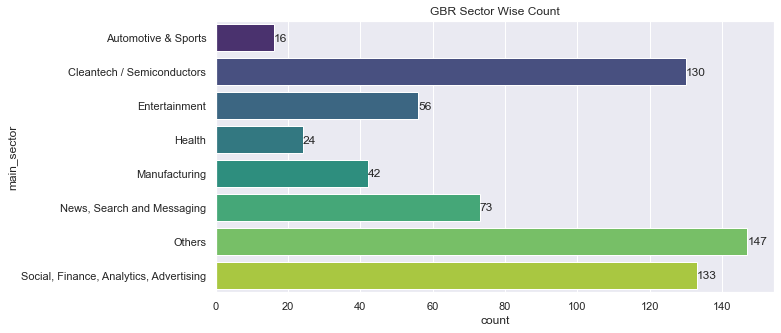

In [66]:
plt.figure(figsize=(10,5))
plt.title('GBR Sector Wise Count')
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=D2.main_sector.sort_values(), data=D2,palette='viridis')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_width()), (p.get_width(), p.get_y()+0.50))

#### Top Sector name (no. of investment-wise) GRB --- Others  --- 147
#### Second Sector name (no. of investment-wise) GRB --- Social, Finance, Analytics, Advertising  --- 133
#### Third Sector name (no. of investment-wise) GRB --- Cleantech / Semiconductors  --- 130

In [67]:
#group by main sector in D3 ('IND data frame') to find count
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

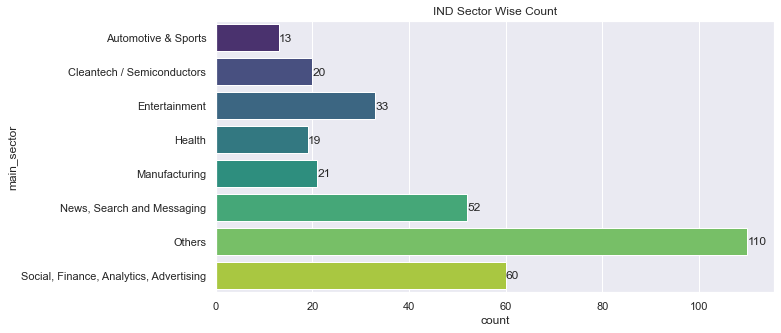

In [68]:
plt.figure(figsize=(10,5))
plt.title('IND Sector Wise Count')
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=D3.main_sector.sort_values(), data=D3,palette='viridis')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_width()), (p.get_width(), p.get_y()+0.50))

#### Top Sector name (no. of investment-wise) IND --- Others --- 110
#### Second Sector name (no. of investment-wise) IND --- Social, Finance, Analytics, Advertising --- 60
#### Third Sector name (no. of investment-wise) IND --- News, Search and Messaging --- 52

In [69]:
#group by main_sector and company permalink to find company recived highest investment
d1_question_9 = D1.groupby(['main_sector','company_permalink'])['raised_amount_usd'].sum().sort_values(ascending = False)

In [70]:
d1_question_9['Others']

company_permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
                                        ...    
/organization/joinem                  5000000.0
/organization/joya-communications     5000000.0
/organization/arigo                   5000000.0
/organization/kagera                  5000000.0
/organization/kashless                5000000.0
Name: raised_amount_usd, Length: 2049, dtype: float64

In [71]:
# For point 3 (top sector count-wise), which company received the highest investment in USA?
d1_question_9['Others'].index[0]

'/organization/virtustream'

In [72]:
d2_question_9 = D2.groupby(['main_sector','company_permalink'])['raised_amount_usd'].sum().sort_values(ascending = False)

In [73]:
# For point 3 (top sector count-wise), which company received the highest investment in GBR?
d2_question_9['Others'].index[0]

'/organization/electric-cloud'

In [74]:
d3_question_9 = D3.groupby(['main_sector','company_permalink'])['raised_amount_usd'].sum().sort_values(ascending = False)

In [75]:
# For point 3 (top sector count-wise), which company received the highest investment in IND?
d3_question_9['Others'].index[0]

'/organization/firstcry-com'

In [76]:
# For point 4 (second best sector count-wise), which company received the highest investment in USA?
d1_question_9['Social, Finance, Analytics, Advertising'].index[0]

'/organization/shotspotter'

In [77]:
# For point 4 (second best sector count-wise), which company received the highest investment in GBR?
d2_question_9['Social, Finance, Analytics, Advertising'].index[0]

'/organization/celltick-technologies'

In [78]:
# For point 4 (second best sector count-wise), which company received the highest investment in IND?
d3_question_9['Social, Finance, Analytics, Advertising'].index[0]

'/organization/manthan-systems'

# Checkpoint 6: Plots

As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:



#### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In [79]:
selected_funds = mean_by_funding_roundtype[['seed','angel','venture','private_equity']]

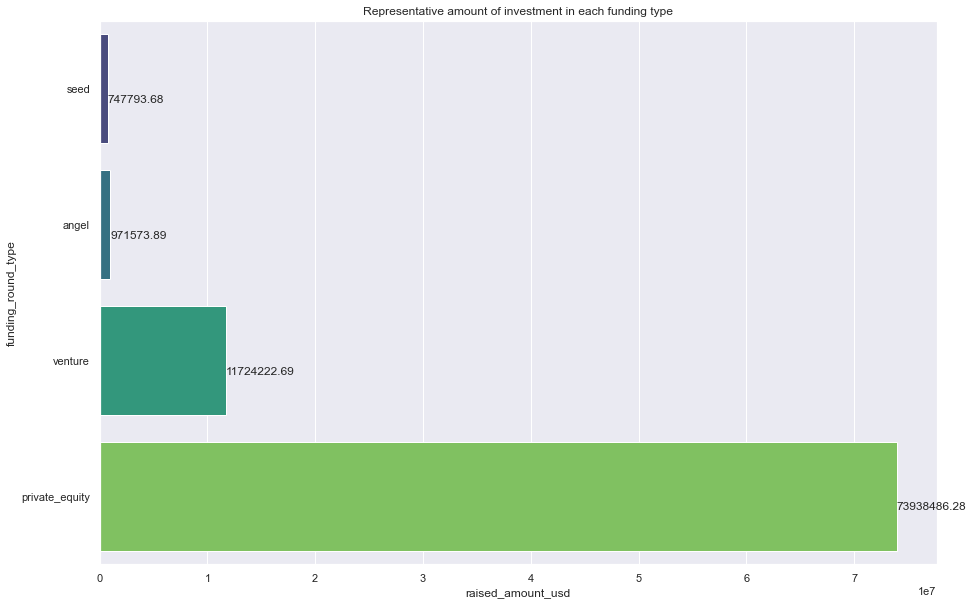

In [80]:
plt.figure(figsize=(15,10))
plt.title('Representative amount of investment in each funding type')
sns.set_theme(style="darkgrid")
ax = sns.barplot(x =selected_funds, y=selected_funds.index,palette='viridis')

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.50))

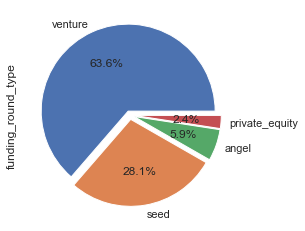

In [81]:
# no of investment in percentage in pie plot
ax = funding_round_type_count.loc[['venture','seed','angel','private_equity']].plot.pie(autopct="%.1f%%",explode=[0.05]*4)
plt.show()

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.   

In [82]:
English_speaking_country = top_9_countries.index.map(lambda country : country in ['USA','GBR','IND','CAN'])
clrs = ['g' if x else 'r' for x in English_speaking_country ]

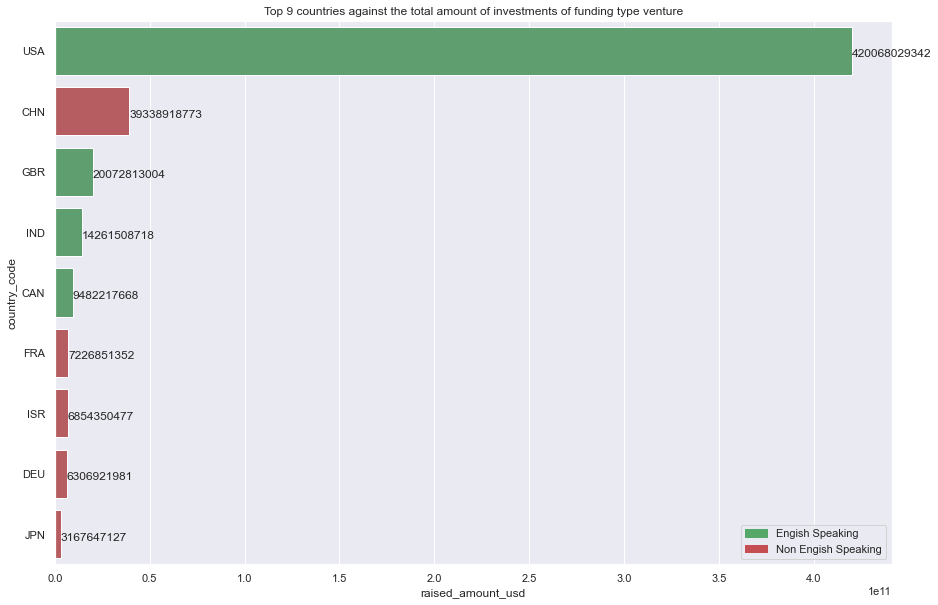

In [83]:
import matplotlib.patches as mpatches
plt.figure(figsize=[15, 10])
plt.title('Top 9 countries against the total amount of investments of funding type venture')
sns.set_theme(style="darkgrid")
ax = sns.barplot(x =top_9_countries, y=top_9_countries.index, palette=clrs)


red_patch = mpatches.Patch(color='g', label='Engish Speaking')
green_patch = mpatches.Patch(color='r', label='Non Engish Speaking')


plt.legend(handles=[red_patch,green_patch]  )

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.50))
     
    


#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [84]:
sector_frame_groupby = sector_main_frame.groupby(['country_code','main_sector'])['country_code'].count().reset_index(name='count')
  

In [85]:
top_3_sectors_in_country = sector_frame_groupby.sort_values('count', ascending=False).groupby('country_code').head(3)

In [86]:

top_3_sectors_in_country.style.hide_index()

country_code,main_sector,count
USA,Others,2950
USA,"Social, Finance, Analytics, Advertising",2714
USA,Cleantech / Semiconductors,2350
GBR,Others,147
GBR,"Social, Finance, Analytics, Advertising",133
GBR,Cleantech / Semiconductors,130
IND,Others,110
IND,"Social, Finance, Analytics, Advertising",60
IND,"News, Search and Messaging",52


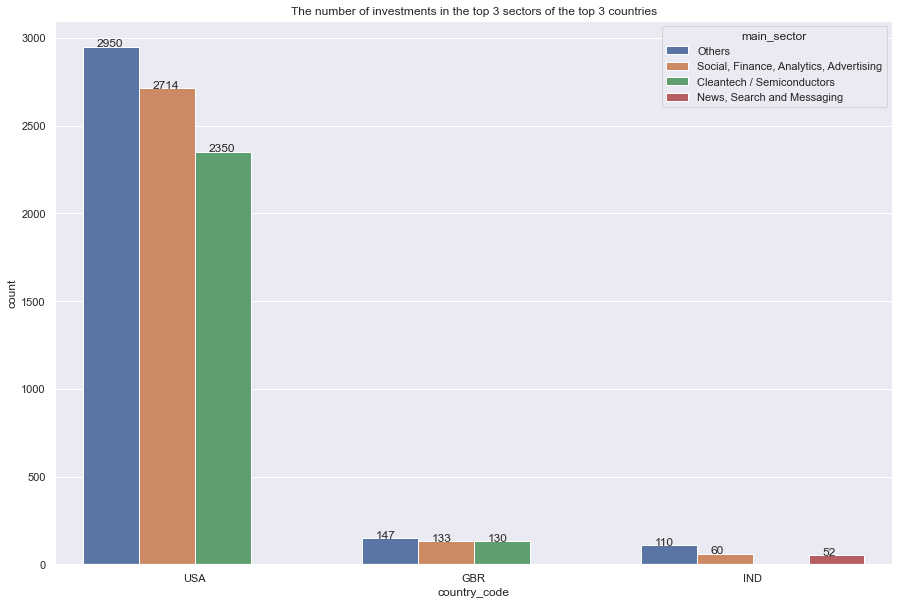

In [87]:
plt.figure(figsize=[15, 10])
plt.title('The number of investments in the top 3 sectors of the top 3 countries')
ax = sns.barplot(x='country_code',y = 'count',hue='main_sector', data=top_3_sectors_in_country)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()))  

    
